In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats
import matplotlib.pyplot as plt


Bad key text.latex.preview in file C:\Users\anubh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\anubh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\anubh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

**Z- test**

In [2]:
data = pd.read_csv("bloodpressure.csv")

In [3]:
data.shape

(120, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [5]:
import scipy.stats as st
import pylab

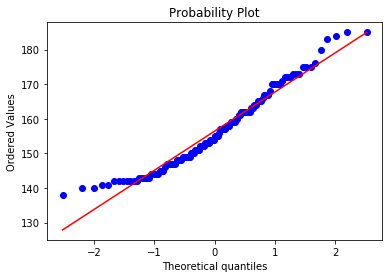

In [6]:
st.probplot(data["bp_before"],dist = "norm",plot = pylab);

In [7]:
data.skew()

patient      0.000000
bp_before    0.554244
bp_after     0.393365
dtype: float64

In [8]:
from scipy.stats import boxcox as bxcx

In [9]:
x = bxcx(data["bp_before"])
x[0]

array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
       0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
       0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
       0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
       0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
       0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
       0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
       0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ,
       0.3344831 , 0.3344831 , 0.33448311, 0.3344831 , 0.33448313,
       0.33448309, 0.33448312, 0.3344831 , 0.33448312, 0.33448312,
       0.33448312, 0.33448312, 0.33448312, 0.33448312, 0.33448312,
       0.33448311, 0.33448308, 0.33448309, 0.33448312, 0.33448311,
       0.33448309, 0.33448308, 0.33448307, 0.33448307, 0.3344831 ,
       0.33448308, 0.33448309, 0.33448309, 0.33448308, 0.33448305,
       0.33448311, 0.3344831 , 0.33448306, 0.33448311, 0.33448

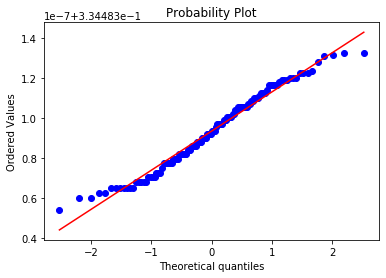

In [10]:
st.probplot(x[0],dist = "norm",plot = pylab);

In [11]:
pd.Series(x[0]).skew()

0.0

In [12]:
pop_mean = x[0].mean()

In [13]:
sample = x[0][0:40]

In [14]:
sample_mean = sample.mean()

In [15]:
round(sample.std(),9)

1.9e-08

In [17]:
# n= 40,alpha  = 0.05, pop_mean,sample_mean,

pop mean = 156.45
sample mean  = 156.25
sample std = 11.44
no. of samples  = 40 
alpha  = 0.05

In [18]:
#pip install statsmodels

In [19]:
from statsmodels.stats.weightstats import ztest

In [20]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

### One -Sample Z test

In [21]:
zval,pval = ztest(sample,value=pop_mean,alternative = "two-sided")
print(pval,zval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9277110905694753 -0.09072501868926955
accept null hypothesis


In [22]:
zval

-0.09072501868926955

In [23]:
neg_int = sample_mean - zval*(sample.std()/np.sqrt(40))

In [24]:
pos_int = sample_mean + zval*(sample.std()/np.sqrt(40))

In [25]:
ci = neg_int,pos_int

In [26]:
ci

(0.3344830935117993, 0.3344830929725685)

In [27]:
neg = data["bp_before"][0:80].mean()+zval*(data.bp_before.std()/np.sqrt(data.shape[0]))

In [28]:
pos=data["bp_before"][0:80].mean()-zval*(data.bp_before.std()/np.sqrt(data.shape[0]))

In [29]:
ci = neg,pos
ci

(156.8306690385021, 157.01933096149793)

### two Sample Z test

In [30]:
ho :  meanof before = meanof after
    meanof before- meanof after = 0
ha : 
    meanof before - meanof after !=0

SyntaxError: invalid syntax (<ipython-input-30-c8e0ae65dca9>, line 1)

In [31]:
zval1,pval = ztest(s1,data["bp_after"][0:40],value = 10.5,alternative = "two-sided")

NameError: name 's1' is not defined

In [32]:
zval1

NameError: name 'zval1' is not defined

In [33]:
pval

0.9277110905694753

In [34]:
if pval<0.05:
    print("reject Null Hypothesis")
else:
    print("Accept null Hypothesis")

Accept null Hypothesis


In [35]:
s2 = data['bp_before'][0:40]
s2.mean()

156.25

In [36]:
neg_int = ((s1.mean() - s2.mean()) - zval*(np.sqrt(((11.44)**2)/40)+((15.62**2)/40)))

NameError: name 's1' is not defined

In [37]:
neg_int

0.3344830935117993

In [38]:
pos_int = ((s1.mean() - s2.mean()) + zval*(np.sqrt(((11.44)**2)/40)+((15.62**2)/40)))

NameError: name 's1' is not defined

In [ ]:
ci = neg_int,pos_int

In [39]:
ci

(156.8306690385021, 157.01933096149793)

In [40]:
data["bp_before"].mean() - data.bp_after.mean()

5.091666666666669

In [41]:
zt,pval = ztest(data['bp_before'][0:40],x2=data["bp_after"][0:40],value=0,alternative = "two-sided")
print(round(pval,2))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.15
accept null hypothesis


### One Sample T-test

In [42]:
from scipy.stats import ttest_1samp
import numpy as np 
import numpy.random

In [43]:
data = np.random.normal(loc = 30,scale = 8,size = 100)
l = []
for i in data:
    l.append(int(round(i,0)))

In [44]:
np.mean(l)

30.72

In [45]:
np.median(l)

30.0

In [46]:
len(l)

100

In [47]:
## Lets take sample
l = np.array(l)
sample_size=10
age_sample=np.random.choice(l,sample_size)

In [48]:
age_sample

array([30, 34, 31, 33, 21, 33, 36, 43, 35, 38])

In [49]:
age_sample.mean()

33.4

In [50]:
ttest,p_value= ttest_1samp(age_sample,l.mean())

In [51]:
print(ttest,p_value)

1.4817916593567162 0.1725376099847662


In [52]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [53]:
df = pd.read_csv("bloodpressure.csv")

In [54]:
df["bp_before"].mean()

156.45

In [55]:
df["bp_before"][10:20].mean()

154.9

In [56]:
df["bp_before"][10:20].std()

13.093255261138587

In [57]:
tval,pval = ttest_1samp(df["bp_before"][10:20],156)
print(tval)
print(pval)

-0.2656715504897832
0.7964776746455889


In [58]:
if pval>0.05:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

accept null hypothesis


### 2 Sample T-test

In [1]:
import scipy.stats
import pandas as pd 

In [2]:
df = pd.read_csv("bloodpressure.csv")

In [3]:
x1 = df["bp_before"][0:40]
x2 = df["bp_after"][0:40]

In [4]:
t_val,pval = scipy.stats.ttest_rel(x1, x2)
print(pval)
print(t_val)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.18971431308295203
1.3347010727377813
accept null hypothesis


### Chi square test

In [62]:
import seaborn as sns

In [63]:
df = sns.load_dataset("tips")

In [64]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Observation Table** 

In [65]:
dataset_table = pd.crosstab(df['sex'],df['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [66]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [67]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


Returns
-------
chi2 : float
    The test statistic.
p : float
    The p-value of the test
dof : int
    Degrees of freedom
expected : ndarray, same shape as `observed`
    The expected frequencies, based on the marginal sums of the table.


In [68]:
import scipy.stats 

In [69]:
val=scipy.stats.chi2_contingency(dataset_table)

In [70]:
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [71]:
if val[1]<0.05:
    print("reject Null , there is relationship between smoker and sex")
else:
    print("accept null , there is no relationship between smoker and sex")

accept null , there is no relationship between smoker and sex


In [ ]:
Expected_Values=val[3]
Expected_Values

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
chi_square_statistic

In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

In [ ]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

### Anova 

In [4]:
import seaborn as sns

In [2]:
df1=sns.load_dataset('iris')

In [5]:
df1["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df_anova = df1[['petal_width','species']]

In [7]:
df_anova

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [12]:
df_anova["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df_anova.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
df_anova["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
pd.unique(df_anova.species.values)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
grps = pd.unique(df_anova.species.values)

In [77]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [78]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [79]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [80]:
F, p = scipy.stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [81]:
print(round(p,4))

0.0


In [82]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [14]:
df1.corr(method = "spearman")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


<AxesSubplot:>

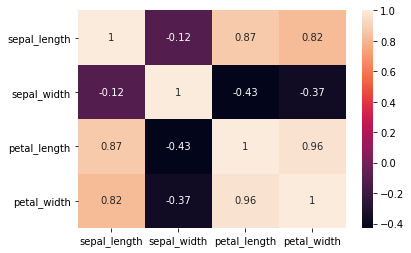

In [16]:
sns.heatmap(df1.corr(),annot = True)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
X = df1.drop(columns = ["species"])
y = df1.species

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(150, 4)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)
X_minmax

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [22]:
import scipy.stats as st 

In [23]:
st.yeojohnson(df1["petal_width"])

NameError: name 'df' is not defined